In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

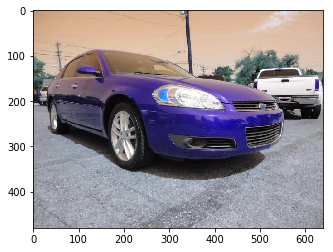

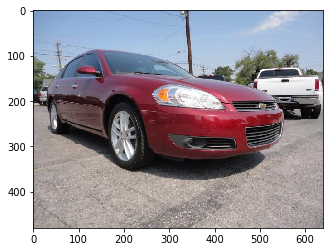

In [7]:
im2 = cv2.imread('/home/ayush/Downloads/cars_test/06486.jpg')

plt.imshow(im2)
plt.show()

im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

plt.imshow(im2)
plt.show()

(1200, 1920, 3)


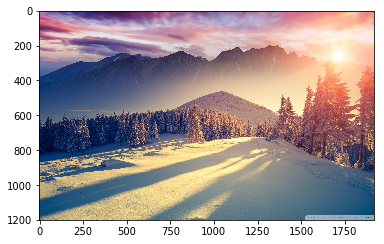

In [16]:
im = cv2.imread('/home/ayush/Pictures/IIT-Workshop/im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print im.shape

plt.imshow(im)
plt.show()

(100, 160, 3)


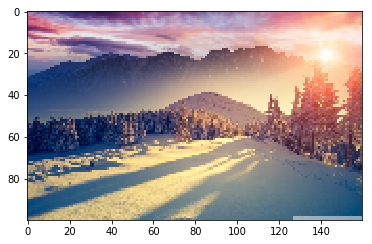

In [17]:
rows = 100
cols = int(100*im.shape[1]/float(im.shape[0]))

im = cv2.resize(im, (cols, rows))
print im.shape

plt.imshow(im)
plt.show()

In [22]:
pixels = np.reshape(im,(100*160, 3))
print pixels.shape
print pixels.dtype

(16000, 3)
uint8


In [24]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
cluster_center = np.array(km.cluster_centers_, dtype='uint32')
print cluster_center
print '-------------'
print cluster_center.shape

[[142  86  90]
 [196 166 184]
 [ 62  83 117]
 [246 217 179]
 [168 139 134]
 [110 116 133]
 [222 176 136]
 [ 26  45  89]]
-------------
(8, 3)


In [40]:
print km.labels_
print km.labels_.shape

#print np.unique(km.labels_, return_counts=True)
freq = np.unique(km.labels_, return_counts=True)[1]
print type(freq)
print freq
print np.sum(freq)

print '--------------'
freq = freq/float(np.sum(freq))
print freq

[4 5 5 ..., 1 1 1]
(16000,)
<type 'numpy.ndarray'>
[1338 1216 2238 2463 2563 2357 2038 1787]
16000
--------------
[ 0.083625   0.076      0.139875   0.1539375  0.1601875  0.1473125
  0.127375   0.1116875]


In [42]:
DOM = []
for ix in range(km.n_clusters):
    vals = [freq[ix], cluster_center[ix]]
    DOM.append(vals)

for ix in DOM:
    print ix

[0.083625000000000005, array([142,  86,  90], dtype=uint32)]
[0.075999999999999998, array([196, 166, 184], dtype=uint32)]
[0.139875, array([ 62,  83, 117], dtype=uint32)]
[0.1539375, array([246, 217, 179], dtype=uint32)]
[0.16018750000000001, array([168, 139, 134], dtype=uint32)]
[0.14731250000000001, array([110, 116, 133], dtype=uint32)]
[0.12737499999999999, array([222, 176, 136], dtype=uint32)]
[0.1116875, array([26, 45, 89], dtype=uint32)]


In [43]:
DOM = sorted(DOM, key=lambda z:z[0], reverse=True)
for ix in DOM:
    print ix

[0.16018750000000001, array([168, 139, 134], dtype=uint32)]
[0.1539375, array([246, 217, 179], dtype=uint32)]
[0.14731250000000001, array([110, 116, 133], dtype=uint32)]
[0.139875, array([ 62,  83, 117], dtype=uint32)]
[0.12737499999999999, array([222, 176, 136], dtype=uint32)]
[0.1116875, array([26, 45, 89], dtype=uint32)]
[0.083625000000000005, array([142,  86,  90], dtype=uint32)]
[0.075999999999999998, array([196, 166, 184], dtype=uint32)]


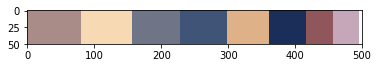

In [47]:
disp_patch = np.ones((50,500,3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*disp_patch.shape[1])
    end = start + width
    disp_patch[:,start:end,:] = 255 - DOM[ix][1]
    start = end
    #plt.axis("off")
    plt.imshow(disp_patch)
plt.show()